# The Problem

The [Swap test](https://en.wikipedia.org/wiki/Swap_test) is a simple quantum circuit which, given two states, allows to compute how much do they differ from each other.

1. Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

2. Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

3. Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. For example, the state
|a> = |01>
Is a product state, while the state
|b> = |00> + |11>
Is not.

Perform a qubit by qubit SWAP test to reconstruct the state. This part of the problem can be solved via a simple grid search.


#The tasks

Python would be the best choice to solve the problem due to the utilitarian packages it has for quantum computation. The python library "qiskit" suffices for the task at hand. Plus python is an intuitive and high-level language. In the chosen library, we will initialize one qubit aligned along the z-axis.

\begin{align*}
|\Psi\rangle & = |0\rangle\\
\end{align*}

Prior to any operation on the initialized state, it must be operated by the Hadamard gate (H-gate). The gate will transform the state into a superposition of two equiprobable basis state $|0\rangle$ and $|1\rangle$. The prepared state becomes:

\begin{align*}
|\Psi\rangle & = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle\\
\end{align*}

There's ample freedom to transform a state vector (qubit) by applying the general unitary operator U. It is expressed as:

\begin{align*}
U = \begin{pmatrix}
cos \left(\frac{\theta}{2}\right) & -e^{-i\lambda}sin\left(\frac{\theta}{2}\right) \\
e^{-i\phi}sin\left(\frac{\theta}{2}\right) & e^{-i(\phi +\lambda)}cos\left(\frac{\theta}{2}\right)
\end{pmatrix} \\
\end{align*}

<br>

The tranformed state lies inside the bloch sphere and since the operator is unitary the norm of state before and after the tranformation remains equal at 1.


<br>

This unitary operator can be **reduced into the three standard rotation operators**.
* $(\theta, \phi, \lambda) \rightarrow (\theta, -\frac{\pi}{2}, \frac{\pi}{2})$ for rotation around x-axis $R_{x}(\theta)$.
* $(\theta, \phi, \lambda) \rightarrow (\theta, 0, 0)$ for rotation around y-axis $R_{y}(\theta)$.
* $(\theta, \phi, \lambda) \rightarrow (0, 0, \lambda)$ for rotation around z-axis $R_{z}(\phi)$.

<br>

## Section 1: Variational circuit
In the following code snippet, we have built a circuit and defined the parameters. The circuit comprises
*  a single qubit.
*  two spherical parameters $\theta$ and $\phi$, and a azimuthal phase $\lambda$.



In [ ]:
%pip install qiskit
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, BasicAer
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from math import sqrt

import matplotlib.pyplot as plt 
import numpy as np

# Spherical Parameters
theta_param = Parameter("theta")
phi_param = Parameter("phi")
lambda_param = Parameter("lambda")

# Register a qubit
qubit = QuantumRegister(1)
bit = ClassicalRegister(1)

# Initializate a circuit 
qc = QuantumCircuit()
qc.add_register(qubit, bit)

##Subsection 1.1: Formulating a parametric circuit
The circuit is initialized in the basis state $|0\rangle$. It needs to be transformed into a superposition state of $|0\rangle$ and $|1\rangle$. For this reason, the H-gate is placed on the circuit. Now, the general unitary operator U can be applied to the superpositioned state. Resulting in its transformation. This resulting transformation traces the Bloch sphere. During the application of the operator, the aforementioned parameters can be passed as its arguments.

In [3]:
# Apply the H-gate
qc.h(qubit)

# General unitary operator with parameters
qc.u3(theta_param, phi_param, lambda_param , qubit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  """


## Subsection 1.2: Testing the parametric circuit
We will conceive two ways to verify that our parametric circuit reproduces the Bloch sphere via the rotation operation. The general unitary operator present in the circuit will be decomposed into rotation operators. The values for $\theta$, $\phi$ and $\lambda$ runs over the range from $0$ to $\pi$, $0$ to $2\pi$ and $0$ to $2\pi$ respectively.

* For the first method, special cases of the state are produced and juxtaposed with the particular geometric cases of the Bloch sphere.

* The second method will exploit the normalization of the state equal 1. 

**Due to a clash between the visualization methods in the library, the histograms depicting the probability amplitude of basis states $|0\rangle$ and $|1\rangle$ are shown after the last Bloch sphere in the corresponding order.**

###A. Special geometric cases
In a superposition state, the qubit is spread out over the Bloch sphere. However, there are few special geometric cases. 

<!-- By manipulating the parameters in our parametric circuit before the application of rotation operation, it'll be plausible to obtain the state at special geometric cases.  -->

**Special geometric cases**
1. When $\theta \in \{0, \pi\}$, the state aligns parallel and anti-parallel along the z-axis. The probability for the qubit to collapse over $|0\rangle$ and $|1\rangle$ equals 1 for $\theta = 0$ and $\theta = \pi$ respectively.

2. Similarly, when $\theta = \frac{\pi}{2}$, the state is anti-parallel and parallel to x-axis for $\phi = \pi$ and $\phi = 2\pi$ respectively. In either case the probability amplitudes of $|0\rangle$ and $|1\rangle$ remains equal to $\frac{1}{2}$.

<br>

**The detials for the test** <br> 
* The test is intended to demonstrate the rotation of the state inside the Bloch sphere under a controlled way.
* Rotation operations around y-axis and z-axis are performed.
* The initialized state is $|x_{+}\rangle$. Such that:

\begin{align*}
|x_{+}\rangle & = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\\
\end{align*}

* This superpositioned state is prepared at $(\theta, \phi) \rightarrow \left(\frac{\pi}{2}, 0\right)$. 


#### A.1 First case

Rotation around Y-axis is performed by $R_{y}(\theta) = u3(\theta, 0, 0)$. The state will be rotated twice around Y-axis by $-\frac{\pi}{2}$ and $\frac{\pi}{2}$ to force the qubit to collapse on to $|0\rangle$ and $|1\rangle$

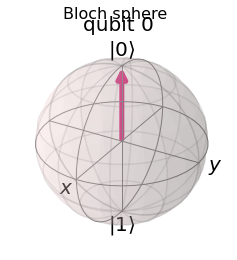

In [4]:
state = Statevector.from_instruction(qc.bind_parameters({theta_param: -0.5*np.pi, phi_param: 0.0, lambda_param: 0.0}))
plot_bloch_multivector(state, title="Bloch sphere")

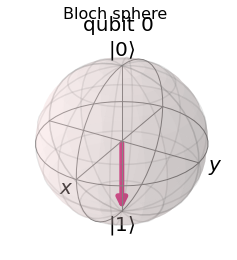

In [5]:
state = Statevector.from_instruction(qc.bind_parameters({theta_param: 0.5*np.pi, phi_param: 0.0, lambda_param: 0.0}))
plot_bloch_multivector(state, title="Bloch sphere")

####A.2 Second case

Rotation around Z-axis is performed by $R_{z}(\theta) = u3(0, \phi, 0)$. The state is rotated twice around Z-axis by $\frac{\pi}{2}$ and $\pi$.

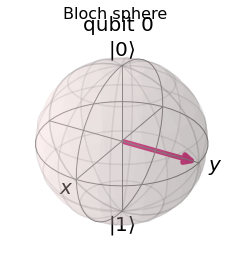

In [6]:
state = Statevector.from_instruction(qc.bind_parameters({theta_param: 0.0, phi_param: 0.5*np.pi, lambda_param: 0.0}))
plot_bloch_multivector(state, title="Bloch sphere")

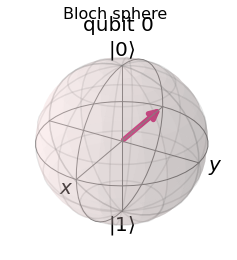

In [7]:
state = Statevector.from_instruction(qc.bind_parameters({theta_param: 0.0, phi_param: np.pi, lambda_param: 0.0}))
plot_bloch_multivector(state, title="Bloch sphere")

###The histograms in corresponding order

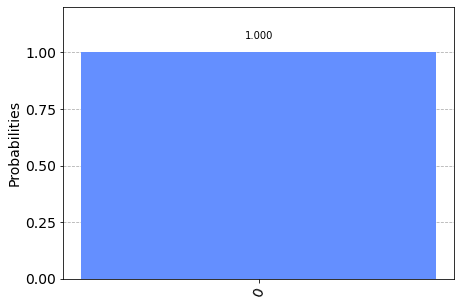

In [8]:
backend = BasicAer.get_backend('qasm_simulator')

qc.measure(qubit, bit)
job = execute(qc.bind_parameters({theta_param: -0.5*np.pi, phi_param: 0.0, lambda_param: 0.0}), backend, shots=1024)
counts = job.result().get_counts(qc)

plot_histogram(counts)

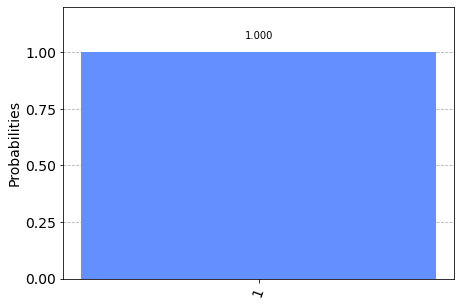

In [9]:
qc.measure(qubit, bit)
job = execute(qc.bind_parameters({theta_param: 0.5*np.pi, phi_param: 0.0, lambda_param: 0.0}), backend, shots=1024)
counts = job.result().get_counts(qc)

plot_histogram(counts)

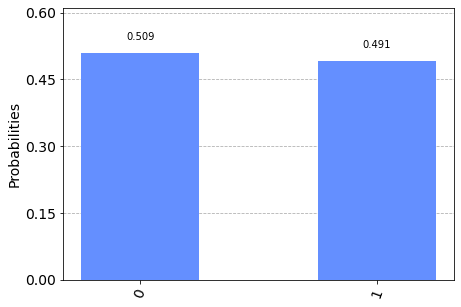

In [10]:
qc.measure(qubit, bit)
job = execute(qc.bind_parameters({theta_param: 0.0, phi_param: 0.5*np.pi, lambda_param: 0.0}), backend, shots=1024)
counts = job.result().get_counts(qc)

plot_histogram(counts)

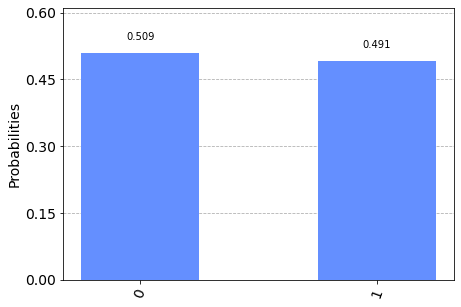

In [11]:
qc.measure(qubit, bit)
job = execute(qc.bind_parameters({theta_param: 0.0, phi_param: np.pi, lambda_param: 0.0}), backend, shots=1024)
counts = job.result().get_counts(qc)

plot_histogram(counts)

###B. Randomly valued parameters
Three rotation operations with random floating values will be fed into the parametric circuit. The norm of the state will be checked to verify its equality with 1. One hundreds random cases are performed.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0]


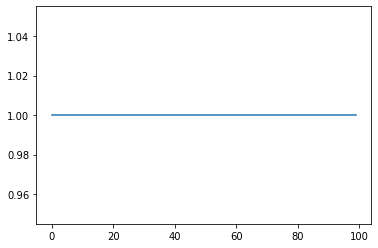

In [12]:
# A simulator which provides us the state vector. 
backend = Aer.get_backend('statevector_simulator')

norms = []
loop_size = 100
for i in range(0, loop_size):
    
    #Random floating points from 0 to 2*pi 
    theta_rand = np.pi*np.random.rand()
    phi_rand = 2*np.pi*np.random.rand()
    
    # Rotation around X-axis
    state = execute(qc.bind_parameters({theta_param: theta_rand, phi_param: -0.5*np.pi, lambda_param: 0.5*np.pi}), backend).result()
    # Rotation around Y-axis
    state = execute(qc.bind_parameters({theta_param: theta_rand, phi_param: 0.0, lambda_param: 0.0}), backend).result()
    # Rotation around Z-axis
    state = execute(qc.bind_parameters({theta_param: 0.0, phi_param: phi_rand, lambda_param: 0.0}), backend).result()
    
    ket = state.get_statevector()
    norms.append(np.linalg.norm(ket))

# Visualization of  norms
print(norms)

plt.plot(range(0, loop_size), norms) 
plt.show()
#------------------------

## Subsection 1.3: Conclusions

The diagrams of the Bloch sphere reveals the rotation of the state vector. The states collapse to $|0\rangle$ and $|1\rangle$ for the first case. And the state rotated around Z-axis by the exact amount passed as the parameter in the second case. Hence the replication of geometric inferences was successfully met. The ensuing bar graphs depicting the probability of the state to collapse on to either of state $|0\rangle$ and $|1\rangle$ corroborated the inferences drawn from the preceding Blochs sphere. 

In the random approach, the calculated norms equaled 1 and plotted on the graph revealed the value of norm for every iteration equals 1. The norm was preserved by the unitary operator.

It is notable that the standard rotation operator $R_{x}(\theta)$, $R_{y}(\theta)$ and $R_{z}(\phi)$ can be applied instead of the general unitary operator.

## Section 2: SWAP test for quantum state with 1 qubit
**The goal will be to discover a specific set of parameters** for the variational circuit such that the two target qubits are identical. The test is said to be successful if it calculates the parameters within a small margin of error of $0.2$. 

From the test carried out in the previous section, it can be asserted that all the points in Bloch's Sphere can be reached by feeding in the parameters to these three rotation operators.   

The Swap test is employed to inspect how much two quantum states differ. The schematic of the controlled SWAP circuit is below.

<br>

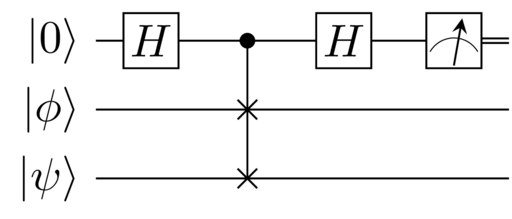

<br>

At the end the measurement gate on the control qubit provides the probability for it to be at state $|0\rangle$. The same probability is written in terms of the inner product of the two target qubits.  

\begin{align*}
P(\text{Control qubit} = |0\rangle) & = \frac{1}{2}\left(1 + |\langle\psi|\phi\rangle|^{2}\right)
\end{align*}

<br>

The value of $P(\text{Control qubit} = |0\rangle)$ is

* $\frac{1}{2}$ when the two target qubits are orthogonal.
* 1 when the two target qubits are identical. 

## Subsection 2.1: Preparation of the circuit
For the task in hand, a parametric circuit is formulated in the next code snippet. Lastly, the circuit's schematic is printed and the three qubits are depicted on the Blochs sphere for a simple observation. 

The control qubit is a simple state $|0\rangle$. Amongst the two target qubit, the first one will be the qubit prepared with the parameters ($\theta$ and $\phi$). The second one is a qubit in a random state superposition.

In [29]:
# Register three new qubits
q = QuantumRegister(3)
bit = ClassicalRegister(1)

# Add new qubits in the circuit
qc = QuantumCircuit(q, bit)

#Random floating points from 0 to 2*pi 
theta_rand = np.pi*np.random.rand()
phi_rand = 2*np.pi*np.random.rand()

# Spherical Parameters
theta_param = Parameter("theta")
phi_param = Parameter("phi")

# Parametrized rotation operators
qc.u3(theta_param, phi_param, 0.0, q[1])

# Randomize the third qubit
qc.u3(theta_rand, phi_rand, 0.0, q[2])


In [30]:
qc.draw()

q1368_0: ───────────────────────
           ┌─────────────────┐  
q1368_1: ──┤ U3(theta,phi,0) ├──
         ┌─┴─────────────────┴─┐
q1368_2: ┤ U3(2.7695,4.0218,0) ├
         └─────────────────────┘
   c4: 1/═══════════════════════

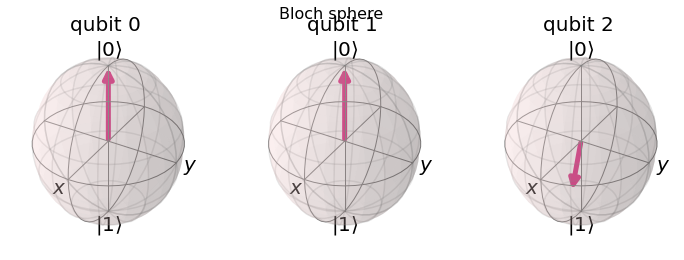

In [31]:
state = Statevector.from_instruction(qc.bind_parameters({theta_param: 0.0, phi_param: 0.0}))
plot_bloch_multivector(state, title="Bloch sphere")

**The qubits**
* "qubit 1" is the control qubit.
* "qubit 2" is the parametrized qubit (target qubit).
* "qubit 3" is the random qubit (target qubit).

##Subsection 2.2: Swap test
The CSWAP test is performed up to n times via a loop. In each loop, the measurement of the probability ($M_{i}$) for the control qubit to be $|0\rangle$ is collected. Once the loop ends, the measurement is averaged over the loop. In turn, this average can be used to express the inner product between the two target states.

\begin{align*}
|\langle\psi|\phi\rangle|^{2} & = \frac{2}{n}\sum_{i=1}^{n}M_{i} - 1
\end{align*}

The inner product $|\langle\psi|\phi\rangle|$ is

* 0 when the two target qubits are orthogonal.
* 1 when the two target qubits are identical. 

<br>

In the following code snippet, a function is defined with arguments to receive a circuit, a loop size, and a shots size.

In [32]:
def measurement(qc_instance, loop_size, shots_size):
    qc_instance.reset(q[0])

    backend = BasicAer.get_backend('qasm_simulator')
    probability_count = 0
    for i in range(0, loop_size):
        # H-gate on the "control_qubit"
        qc_instance.h(q[0])
        # CSWAP (Fredkin Gate)
        qc_instance.cswap(q[0], q[1], q[2])
        # H-gate on the "control_qubit"
        qc_instance.h(q[0])
    
        qc_instance.measure(q[0], bit)
        job = execute(qc_instance, backend, shots= shots_size).result()
        probability_count += job.get_counts(qc_instance)['0']/shots_size
    
        #Reset the control gate
        qc_instance.reset(q[0])

    return sqrt(abs(2*probability_count/loop_size -1))

## Subsection 2.3: Search for the parameters
At this point, the circuit is ready for the SWAP test. Only two parameters need to be sought namely, $\theta$ and $\phi$. The task is performed by the following procedure.

* Firstly, the value for the parameter $\theta$ will be sought for which the probability between the two target qubits is maximum.
* Secondly, the same procedure is carried out for the parameter $\phi$. However, this time the value of $\theta$ for which the probability was maximum in the preceding iteration can be used.

## Subsection 2.4: Result
The random qubit have the parameters $(\theta, \phi) = (2.7695,4.0218)$. The calculated parameters generated by the SWAP test is $(\theta, \phi) = (2.9, 3.8)$.

The calculated value of the parameters is used to produce a Bloch sphere below. 

The calculated parameters
{'probability': 0.9970957827611145, 'theta': 2.9000000000000004, 'phi': 3.8}
 
 


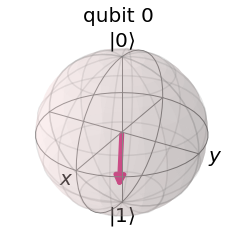

In [33]:
# The inner product between two target qubit must be greater than this
definitive_probability = 0.99
parameters = {"probability" : 0}

loop_size= 10
shots = 1000
increased_counts = 0
for theta in np.arange (0.0, 2.0*np.pi, 0.1):
    probability = measurement(qc.bind_parameters({theta_param: theta, phi_param: 0.0}), loop_size, shots)
    
    # if probability is 1 then the loop breaks
    if (probability == 1):
        parameters["probability"] = probability
        parameters["theta"] = theta
        break

    # if the probability is near to 1 then the loop breaks
    if (theta > 0 and parameters["probability"] > definitive_probability):
        break

    if (parameters["probability"] < probability and probability < 1):
        parameters["probability"] = probability
        parameters["theta"] = theta
        increased_counts += 1

    # If the maximum probability is reached then break the loop
    if (parameters["probability"] > probability and increased_counts == 4):
        break
        
for phi in np.arange (0.0, 2.0*np.pi, 0.1):
    probability = measurement(qc.bind_parameters({theta_param: parameters["theta"], phi_param: phi}), loop_size, shots)
    
    # if probability is 1 then the loop breaks
    if (probability == 1):
        parameters["probability"] = probability
        parameters["phi"] = phi

        break

    if (parameters["probability"] < probability):
        parameters["probability"] = probability
        parameters["phi"] = phi

    # if the probability is near to 1 then the loop breaks
    if (parameters["probability"] > definitive_probability and probability < 1):
        break

print("The calculated parameters")
print(parameters)

print(" ")
print(" ")

q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.u3(parameters["theta"], parameters["phi"], 0.0, q)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

##Subsection 2.5: Conclusions
The SWAP test computed the value of parameters ($\theta$ and $\phi$) to be $(2.9, 3.8)$. Which is within a small margin of error. However, the accuracy can be increased by increasing the definitive probability to be greater than $0.99$. With these calculated parameters a Bloch sphere was produced which closely resembles the Bloch sphere for random qubit shown in subsection 2.1.

The SWAP test determines the degree of difference between two quantum state which can have various implications.

## Section 3: SWAP test for a quantum state with N qubits

Instead of a single registry, in this test, there can be N qubits in a registry. This means the registry is a quantum state with N qubits. In the following test, a quantum circuit with two quantum registries having four (target) qubits each and a registry with a control qubit is prepared. The four qubits in the first registry are randomized to be either $|0\rangle$ or $|1\rangle$. 

The task will be to perform a SWAP test for each pair of qubits in the two registries which calculate their inner product. If the inner product between the states is less than $0.1$ the qubit in the second registry will be flipped by treating it with the bit flip gate. This makes sure that the qubits in the second registry are identical to those in the first registry.

For the visualization, the Bloch Sphere is drawn below. The rest of the procedure is the same as the SWAP test performed in the preceding Section 2. 

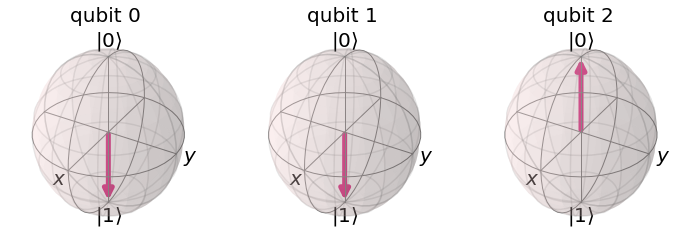

In [48]:
n = 3

# Qubit Registration
q_rand = QuantumRegister(n)

# Quantum Circuit
qc = QuantumCircuit()
qc.add_register(q_rand)

#Randomize the qubits in the q_rand registry
for i in range(0, n):
    theta_rand = np.random.rand()
    if (theta_rand > 0.5):
        qc.x(q_rand[i])

# Visualize the circuit
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [49]:
# Register remaining of the qubits
q_control = QuantumRegister(1)
q = QuantumRegister(n)
bit = ClassicalRegister(1)

# Complete the cicuit for SWAP test
qc.add_register(q_control)
qc.add_register(q)
qc.add_register(bit)

The python code to perform the SWAP test for the N-qubits system is similar to that with 1 qubit. The previous code is amended to incorporate the multiple qubits, which is shown below.

##Subsection 3.1: Results

After the Swap test was completed the probability measurement between two qubits in two target registries were equal to 1. In this case the state is $|110\rangle$. 

*Moreover, The bloch diagrams for the two registries could not be shown because of following error "qiskiterror: Cannot apply instruction with classical registers: measure'"*

In [50]:
def measurement(qc_instance, qr_rand, qr, loop_size, shots_size):
    qc_instance.reset(q_control)

    backend = BasicAer.get_backend('qasm_simulator')
    probability_count = 0
    for i in range(0, loop_size):
        # H-gate on the "control_qubit"
        qc_instance.h(q_control)
        # CSWAP (Fredkin Gate)
        qc_instance.cswap(q_control, qr_rand, qr)
        # H-gate on the "control_qubit"
        qc_instance.h(q_control)
    
        qc_instance.measure(q_control, bit)
        job = execute(qc_instance, backend, shots= shots_size).result()
        probability_count += job.get_counts(qc_instance)['0']/shots_size

        #Reset the control gate
        qc_instance.reset(q_control)

    return sqrt(abs(2*probability_count/loop_size -1))

loop_size = 10
shots = 1000
for i in range(0, n):
    probability = measurement(qc, q_rand[i], q[i], loop_size, shots)

    # If the qubit is orthogonal then flip it.

    if (probability < 0.1):
        qc.x(q[i])
        print (1)
    else:
        print (0)
        
for i in range(0, n):
    print ("The probability of two qubits in the two registries")
    print (measurement(qc, q_rand[i], q[i], loop_size, shots))


1
1
0
The probability of two qubits in the two registries
1.0
The probability of two qubits in the two registries
1.0
The probability of two qubits in the two registries
1.0
